# Great Learning - Capstone Project - NLP | Automated Ticket Assignment
*  **Submitted By**: Gaurav, Karishma, Lavanya, Pallavi and Swati 
* **Status** : In-Progress (EDA, Feature Engineering & Selection)
* **Date of Submission** : TBD
* **Dataset** : https://drive.google.com/drive/u/0/folders/1xOCdNI2R5hiodskIJbj-QySMQs6ccehL

# Problem Statement
One of the key activities of any IT function is to ensure there is no impact to the Business operations through Incident Management process. An incident is an unplanned interruption to an IT service or reduction in the quality of an IT service that affects the Users and the Business.

The main goal of Incident Management process is to provide a quick fix / workarounds or solutions that resolves the interruption and restores the service to its full capacity to ensure no business impact.

These incidents are created by various stakeholders (Business Users, IT Users and Monitoring Tools) within IT Service Management Tool and are assigned to Service Desk teams (L1 / L2 teams). 

**The goal of this project is to build a classifier that can classify the incidents by analysing text**.


# Solution
The solution is to build a classification model that can analyse the text and classify to appropriate Service Desk team.

# Approach


*   Analyse and Understand the structure of data
*   Visualize data
*   Text preprocessing
*   Create word vocabulary and Tokens
*   Build a Classification model
*   Train the model
*   Test the Model 

## Get Required Files from Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
# changing present working directory
import os
os.chdir("/content/drive/My Drive/Capstone Project")
os.getcwd()

'/content/drive/My Drive/Capstone Project'

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.set_palette("Spectral")
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
import DataPreprocessor as DP

from pprint import pprint
from sklearn import preprocessing 

import warnings
warnings.filterwarnings(action='ignore')

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [7]:
# NLTK Stop words
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('words')
words = set(nltk.corpus.words.words())
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['received from', 'hi', 'hello','i','am','cc','sir','good morning','gentles','dear','kind','best','please',''])
from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer 
from nltk.stem import WordNetLemmatizer
from gensim.utils import tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


#**## Reading and Exploring Data**

## Reading Data "Input Data Synthetic (created but not used in our project).xlsx". Exploring the data and getting some insights about the data.

In [8]:
# Read Dataset
file_name = "Ticket_Data.xlsx" 
df = pd.read_excel(file_name,encoding='cp1252')
df = df.rename(columns = {"Short description": "Short_description",
                          "Assignment group": "Group"})
DELETE_CALLER = False

df.head()

,Short_description,Description,Caller,Group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [9]:
# Checking Shape of the data
print("Data shape:", df.shape)
print("Data Description:")
df.describe()

Data shape: (8500, 4)
Data Description:


,Short_description,Description,Caller,Group
count,8492,8499,8500,8500
unique,7481,7817,2950,74
top,password reset,the,bpctwhsn kzqsbmtp,GRP_0
freq,38,56,810,3976


## Drop "Caller" column based on flag set by DELETE_CALLER. It seems to be anonymised data (usernames/ids). 

In [25]:
df_v1 = df
if DELETE_CALLER:
  df_v1 = df.drop('Caller',axis=1)
else:
  df_v1['Caller'] =  df_v1['Caller'].apply(lambda x: x.replace(" ", "_"))
df_v1.head(20)

,Short_description,Description,Caller,Group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir_pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb_komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm_ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz_gcpydteq,GRP_0
4,skype error,skype error,owlgqjme_qhcozdfx,GRP_0
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn_ltdgrvkz,GRP_0
6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,jyoqwxhz_clhxsoqy,GRP_1
7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,eqzibjhw_ymebpoih,GRP_0
8,unable to disable add ins on outlook,unable to disable add ins on outlook,mdbegvct_dbvichlg,GRP_0
9,ticket update on inplant_874773,ticket update on inplant_874773,fumkcsji_sarmtlhy,GRP_0


In [13]:
# Drop duplicate rows
df_v1 = df_v1.drop_duplicates(keep='first', inplace=False)

# Fetch rows with same data in "Short_description" & "Description"
df_v1[df_v1['Short_description'] == df_v1['Description']].count()

Short_description    2818
Description          2818
Caller               2818
Group                2818
dtype: int64

## Finding & Imputing Null values in Short Description & Description columns

In [14]:
# Check for number of null values in each columns
print("Total Null Values in data:", df_v1.isnull().sum().sum())
print("\nNull Values accross columns:\n", df_v1.isnull().sum())
print("\nData with 'Null' Short Description")
df_v1.loc[df_v1['Short_description'].isnull()==True]

Total Null Values in data: 9

Null Values accross columns:
 Short_description    8
Description          1
Caller               0
Group                0
dtype: int64

Data with 'Null' Short Description


,Short_description,Description,Caller,Group
2604,NaN,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...,ohdrnswl_rezuibdt,GRP_34
3383,NaN,\r\n-connected to the user system using teamvi...,qftpazns_fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn.\r\n-connected to...,awpcmsey_ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn.\r\n-connected to...,rhwsmefo_tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn.\r\n-connected to...,hxripljo_efzounig,GRP_0
3921,NaN,-user unable tologin to vpn.\r\n-connected to...,cziadygo_veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,wvqgbdhm_fwchqjor,GRP_0
4341,NaN,\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...,eqmuniov_ehxkcbgj,GRP_0


In [15]:
print("\nData with 'Null' Description")
df_v1.loc[df_v1['Description'].isnull()==True]


Data with 'Null' Description


,Short_description,Description,Caller,Group
4395,i am locked out of skype,NaN,viyglzfo_ajtfzpkb,GRP_0


In [26]:
# Impute missing values
df_v1['Short_description'].fillna('the', inplace=True) # replacing null values with stopword 'the'
df_v1['Description'].fillna('the', inplace=True) # replacing null values with stopword 'the'

print("Null values imputed")
print("Null Values in data after imputation:", df_v1.isnull().sum().sum())

Null values imputed
Null Values in data after imputation: 0


## For "Assignment Group" type where number of tickets in the category is less than specified freuency, we will mark then into "GRP_Manual". All "GRP_Manual" tickets should be triaged manually, until the model has enough data to categorise them automatically.

In [27]:
# Reset Assignment Group for group types with less data
Frequency_Threshold = 50
count = df_v1['Group'].value_counts(ascending=True)
idx = count[count.lt(Frequency_Threshold)].index
df_v1.loc[df_v1['Group'].isin(idx), 'Group'] = 'GRP_Manual'
print("Updated unique group types",df_v1['Group'].nunique())
df_v1['Group'].value_counts(ascending=True)


Updated unique group types 25


GRP_26          56
GRP_34          62
GRP_7           68
GRP_31          69
GRP_17          81
GRP_16          85
GRP_18          88
GRP_29          97
GRP_4          100
GRP_33         107
GRP_25         116
GRP_14         118
GRP_5          129
GRP_10         140
GRP_13         145
GRP_6          184
GRP_3          200
GRP_19         215
GRP_2          241
GRP_9          252
GRP_12         257
GRP_24         289
GRP_8          661
GRP_Manual     764
GRP_0         3976
Name: Group, dtype: int64

## Text Cleaning

In [28]:
# Cleaned both - 'Short_Description & Description'
df_v1.Short_description = DP.text_preprocessing(df_v1.Short_description)
df_v1.Description = DP.text_preprocessing(df_v1.Description)
df_v1.head()

,Short_description,Description,Caller,Group
0,login issue,verified user details. checked the user name ...,spxjnwir_pjlcoqds,GRP_0
1,outlook,received from hello team my meetings skype me...,hmjdrvpb_komuaywn,GRP_0
2,cant log in to vpn,received from hi i cannot log on to vpn best,eylqgodm_ybqkwiam,GRP_0
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz_gcpydteq,GRP_0
4,skype error,skype error,owlgqjme_qhcozdfx,GRP_0


## Concatenating "Short Description" and "Description" to get "Summary" Tickets

In [30]:
df_v1["Summary"] = df_v1['Short_description'].str.cat(df_v1['Description'], sep = ". ")
if not(DELETE_CALLER):
  df_v1["Summary"] = df_v1['Summary'].str.cat(df_v1['Caller'], sep = ". ")
  df_v1 = df_v1.drop(['Caller'],axis=1)
df_v2 = df_v1.drop(['Short_description','Description'],axis=1)
df_v2 = df_v2[['Summary','Group']]
df_v2.head(20) 

,Summary,Group
0,login issue. verified user details. checked t...,GRP_0
1,outlook. received from hello team my meetings...,GRP_0
2,cant log in to vpn. received from hi i cannot...,GRP_0
3,unable to access hr tool page. unable to acces...,GRP_0
4,skype error . skype error . owlgqjme_qhcozdfx,GRP_0
5,unable to log in to engineering tool and skype...,GRP_0
6,event the value of mountpoint threshold for . ...,GRP_Manual
7,employment status new non employee . employm...,GRP_0
8,unable to disable add ins on outlook. unable t...,GRP_0
9,ticket update on . ticket update on . fumkcsji...,GRP_0


In [0]:
# word tokenisation & removal of stop words & gibberish word(by typos, anonymised names)

# Remove stopwords
df_v2['Summary'] = df_v2['Summary'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

# Remove words not in Englsih Dictionary (typos, anonymised names)
df_v2['Summary'] = df_v2['Summary'].apply(lambda x: ' '.join([word for word in x.split() if word in (words)]))

# Tokenise 'Summary' column
data = df_v2.Summary.values.tolist()
data = [list(tokenize(sentences)) for sentences in data]

# Remove duplicates
temp = []
unique_words_per_row = []
for eachrow in data:
    unique_words_per_row = list(dict.fromkeys(eachrow))
    temp.append(unique_words_per_row)
data = temp

# lemmetise words
# porter_stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()
temp = []
for eachrow in data:
    lemma_words = []
    for eachword in eachrow:
        if len(eachword) > 1:
          # eachword = porter_stemmer.stem(eachword) # words being overstemmed 
          eachword = wordnet_lemmatizer.lemmatize(eachword, pos = "n")
          eachword = wordnet_lemmatizer.lemmatize(eachword, pos = "v")
          eachword = wordnet_lemmatizer.lemmatize(eachword, pos = ("a"))
          lemma_words.append(eachword)
    temp.append(lemma_words)
data = temp 

data = [(" ".join(sentence))  for sentence in data]

In [0]:
def wordCloudText(data, title):
  title = ("Most Frequent words in ") + title
  stopwords = set(STOPWORDS)
  wordcloud = WordCloud(background_color='black', stopwords=stopwords, max_words=200,
                        max_font_size=40, random_state=42).generate(str(data))
  print(wordcloud)
  fig = plt.figure(1,figsize = (20, 8))
  plt.imshow(wordcloud)
  plt.title(title ,fontsize=30)
  plt.axis('off')
  plt.show()

Count of words in corpus after data preprocessing:  Counter({'receive': 2401, 'job': 1005, 'password': 953, 'unable': 879, 'tool': 824, 'reset': 697, 'user': 692, 'need': 683, 'work': 671, 'access': 626, 'issue': 620, 'account': 603, 'company': 601, 'get': 596, 'error': 566, 'help': 548, 'ticket': 539, 'name': 464, 'system': 425, 'login': 421, 'try': 396, 'see': 393, 'outlook': 390, 'able': 389, 'send': 370, 'new': 356, 'check': 351, 'log': 348, 'team': 345, 'connect': 335, 'message': 329, 'contact': 329, 'number': 312, 'engineer': 307, 'since': 304, 'customer': 304, 'network': 302, 'update': 300, 'cannot': 299, 'id': 295, 'summary': 294, 'open': 292, 'lock': 285, 'time': 278, 'attach': 250, 'management': 247, 'use': 247, 'server': 244, 'type': 241, 'start': 235, 'site': 231, 'subject': 224, 'change': 223, 'request': 222, 'could': 219, 'call': 215, 'print': 209, 'power': 208, 'vendor': 205, 'unlock': 199, 'manager': 198, 'follow': 198, 'language': 190, 'browser': 189, 'active': 187, 'e

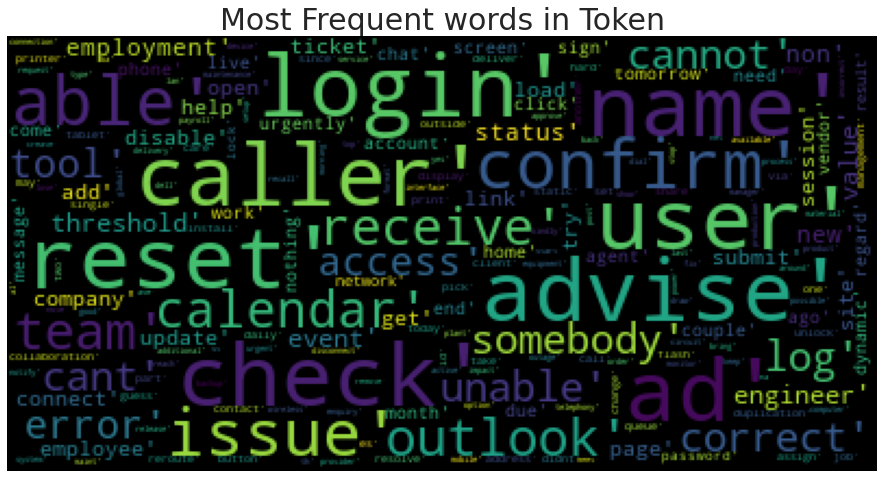

In [44]:
# Display unique words in corpus
from collections import Counter
words_in_corpus = []
for eachrow in temp:
    for eachword in eachrow:    
      words_in_corpus.append(eachword)

counts = Counter(words_in_corpus)
print("Count of words in corpus after data preprocessing: ", counts)

unique_words_in_corpus = list(dict.fromkeys(words_in_corpus))
wordCloudText(unique_words_in_corpus, "Token")

In [0]:
maxlen = 0
for sentence in data:
    if (maxlen < sentence.count(' ')+1 ):
        maxlen = sentence.count(' ')+1
    
# Create Word Embeddings
tfidf_vectors = TfidfVectorizer(min_df=3,max_features= maxlen)
tfidf_db = tfidf_vectors.fit_transform(data).toarray()
tfidf_db = pd.DataFrame(tfidf_db)

le = preprocessing.LabelEncoder() 
df_v2['Group']= le.fit_transform(df_v2['Group']) # LabelEncode 'Groups'
df_v2.head(20)

,Summary,Group
0,login user checked user name ad reset advised ...,0
1,received team outlook calendar somebody advise...,0
2,cant log received cannot log,0
3,unable access tool unable access tool,0
4,error error,0
5,unable log engineering tool unable log enginee...,0
6,event value threshold event value threshold,24
7,employment status new non employee employment ...,0
8,unable disable add unable disable add,0
9,ticket update ticket update,0


In [0]:
X = tfidf_db
y = df_v2['Group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [0]:
svm_model = SVC(kernel='linear',C=10)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print("Training Accuracy: {0:.3f}".format(svm_model.score(X_train, y_train)))
print("Test Accuracy: {0:.3f}".format(svm_model.score(X_test, y_test)))

Training Accuracy: 0.714
Test Accuracy: 0.580


In [0]:
# Bagging Ensemble for Classifying tickets
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC

seed = 1075
np.random.seed(seed)

# Create classifiers
rf = RandomForestClassifier()
et = ExtraTreesClassifier()
knn = KNeighborsClassifier()
svc = SVC()
rg = RidgeClassifier()
clf_array = [rf, et, knn, svc, rg]

for clf in clf_array:
    bagging_clf = BaggingClassifier(clf, max_samples=0.4, max_features=10, random_state=seed)
    bagging_scores = cross_val_score(bagging_clf, X_train, y_train, cv=10, n_jobs=-1)
    
    print ("Mean of: {1:.3f} [Bagging {0}]\n".format(clf.__class__.__name__, bagging_scores.mean()))

Mean of: 0.593, std: (+/-) 0.009 [RandomForestClassifier]
Mean of: 0.486, std: (+/-) 0.007 [Bagging RandomForestClassifier]

Mean of: 0.598, std: (+/-) 0.010 [ExtraTreesClassifier]
Mean of: 0.486, std: (+/-) 0.007 [Bagging ExtraTreesClassifier]

Mean of: 0.561, std: (+/-) 0.016 [KNeighborsClassifier]
Mean of: 0.490, std: (+/-) 0.005 [Bagging KNeighborsClassifier]

Mean of: 0.595, std: (+/-) 0.009 [SVC]
Mean of: 0.469, std: (+/-) 0.001 [Bagging SVC]

Mean of: 0.578, std: (+/-) 0.012 [RidgeClassifier]
Mean of: 0.467, std: (+/-) 0.000 [Bagging RidgeClassifier]



In [0]:
from sklearn.ensemble import VotingClassifier
clf = [rf, et, knn, svc, rg]
eclf = VotingClassifier(estimators=[('Random Forests', rf), ('Extra Trees', et), ('KNeighbors', knn), ('SVC', svc), 
                                    ('Ridge Classifier', rg)], voting='hard')
for clf, label in zip([rf, et, knn, svc, rg, eclf], ['Random Forest', 'Extra Trees', 'KNeighbors', 'SVC', 
                                                     'Ridge Classifier', 'Ensemble']):
    scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.58 (+/- 0.02) [Random Forest]
Accuracy: 0.59 (+/- 0.01) [Extra Trees]
Accuracy: 0.54 (+/- 0.02) [KNeighbors]
Accuracy: 0.59 (+/- 0.01) [SVC]
Accuracy: 0.57 (+/- 0.01) [Ridge Classifier]
Accuracy: 0.59 (+/- 0.01) [Ensemble]


In [4]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from mlxtend.classifier import EnsembleVoteClassifier

ada_boost = AdaBoostClassifier()
grad_boost = GradientBoostingClassifier()
xgb_boost = XGBClassifier()

boost_array = [ada_boost, grad_boost, xgb_boost]
eclf = EnsembleVoteClassifier(clfs=[ada_boost, grad_boost, xgb_boost], voting='hard')
labels = ['Ada Boost', 'Grad Boost', 'XG Boost', 'Ensemble']
for clf, label in zip([ada_boost, grad_boost, xgb_boost, eclf], labels):
    scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
    print("Mean: {0:.3f} of [{1}]".format(scores.mean(), label))

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


NameError: ignored